In [11]:
from scipy import stats
import numpy as np
from datasets.bmnist import bmnist
from torchvision.utils import save_image
import scipy
from matplotlib import pyplot as plt
from a3_vae_template import VAE
import torch
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
x = np.linspace(-3, 3, 1000)

In [35]:
p = stats.norm.pdf(x, 0, 1)
q = stats.norm.pdf(x, 10, 1)
stats.entropy(p,q)

22.639723952964186

In [10]:
data = bmnist()[0]
for batch in data:
    save_image(batch[:25].view(25, 1, 28, 28), 'results/real_binaryb.png', normalize=True, nrow=5)
    break

In [9]:
vae = VAE(hidden_dim=512, z_dim=2)
vae.load_state_dict(torch.load('results/2018-10-16 23:17:03.248038.2/model.pth.tar'))

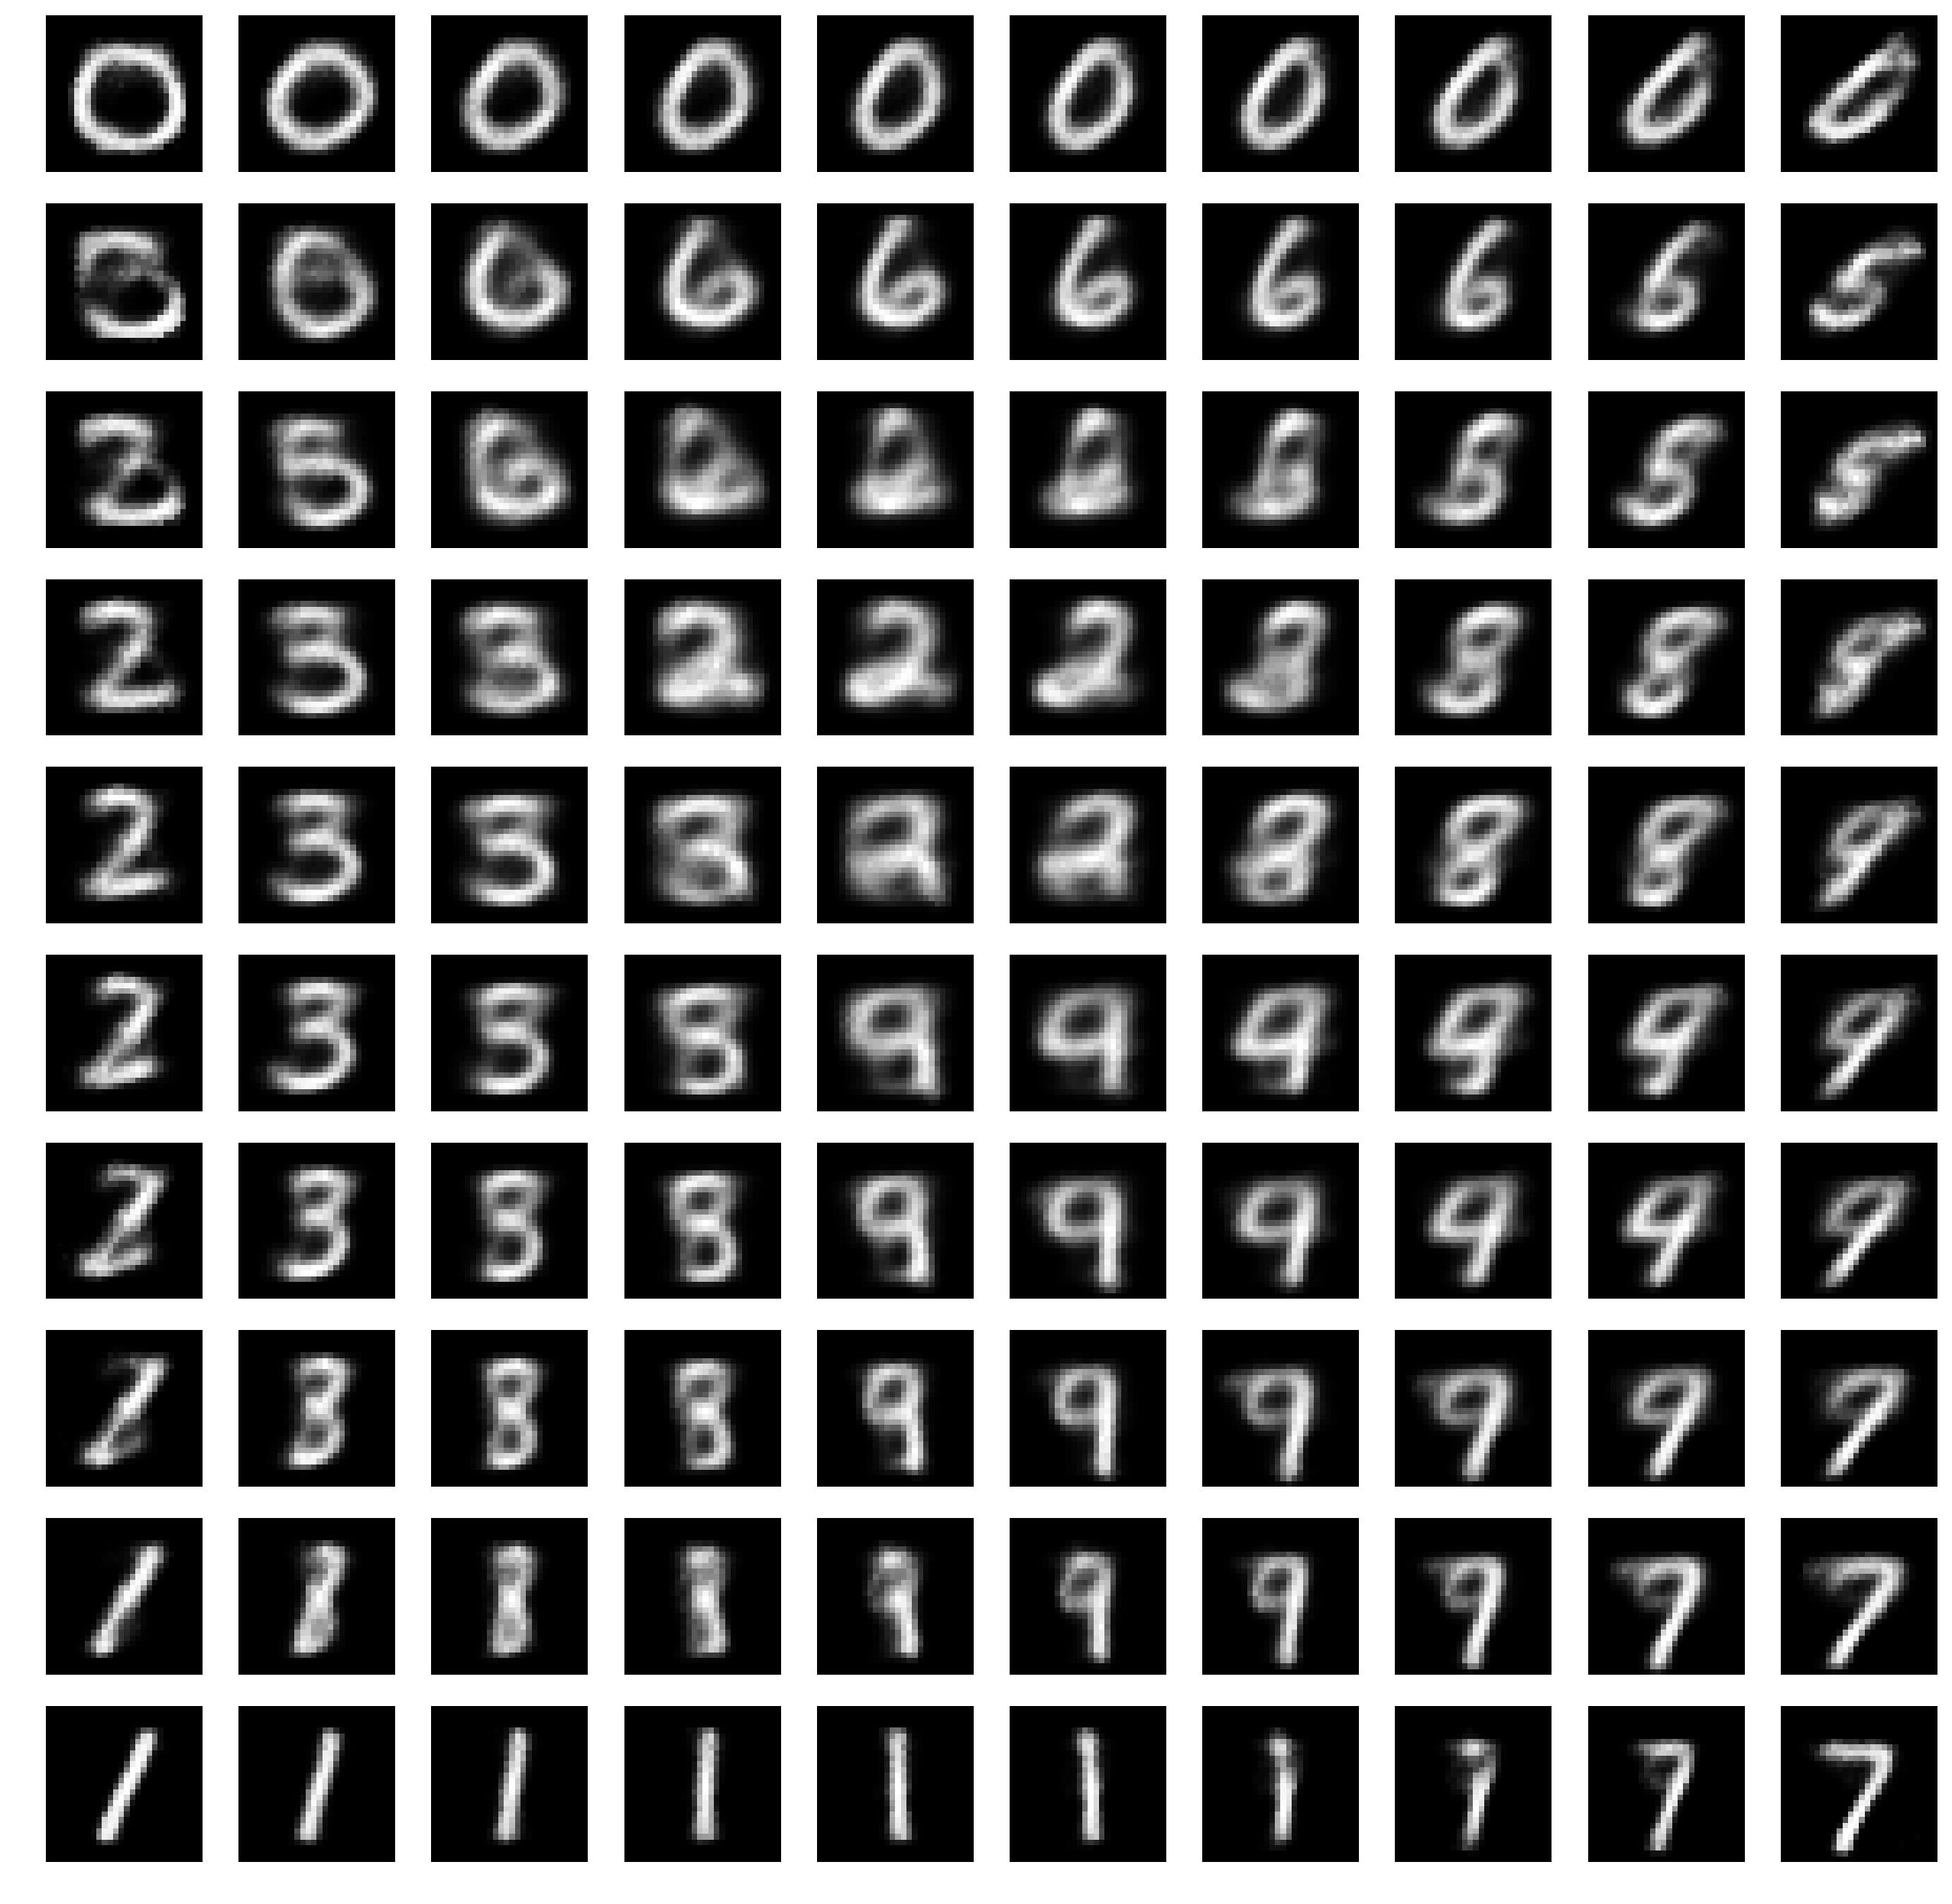

In [12]:
N = 10
percentiles = np.linspace(0, 1, N)
percentiles[0] += (percentiles[1] - percentiles[0]) / 10
percentiles[-1] -= (percentiles[-1] - percentiles[-2]) / 10
inv_cdf = scipy.stats.norm.ppf(percentiles)
plt.figure(figsize=(2*N,2*N), dpi=160)
for i in range(N):
    for j in range(N):
        x_hat = vae.decoder(torch.Tensor([inv_cdf[i],inv_cdf[j]]))
        plt.subplot(N, N, i*(N) + j + 1)
        plt.imshow(x_hat.view(1,28,28).squeeze().data.numpy(), cmap='gray')
        plt.axis('off')
plt.savefig('results/2018-10-16 23:17:03.248038.2/manifold.png')

In [46]:
df: pd.DataFrame = pd.read_csv('results/2018-10-16 18:09:06.552283.GAN.5/results/gan.csv')
df_melted = df.melt(id_vars='Step')

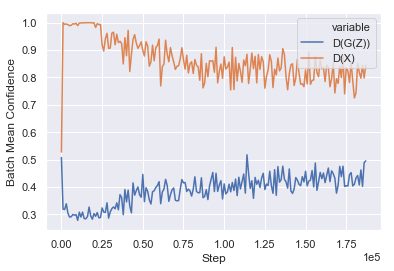

In [58]:
confidence = pd.concat([df_melted[df_melted['variable'] == 'D(G(Z))'], df_melted[df_melted['variable'] == 'D(X)']])
confidence.columns = ['Step', 'variable', 'Batch Mean Confidence']
ax = sns.lineplot(x='Step', y='Batch Mean Confidence', hue='variable', data=confidence, ci=None)
ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,2))
ax.legend(loc='upper right')
ax.get_figure().savefig('results/2018-10-16 18:09:06.552283.GAN.5/results/confidence.png')

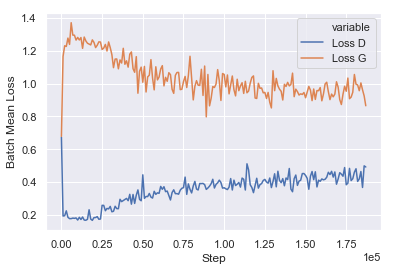

In [57]:
losses = pd.concat([df_melted[df_melted['variable'] == 'Loss D'], df_melted[df_melted['variable'] == 'Loss G']])
losses.columns = ['Step', 'variable', 'Batch Mean Loss']
ax = sns.lineplot(x='Step', y='Batch Mean Loss', hue='variable', data=losses, ci=None)
ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,2))
ax.legend(loc='upper right')
ax.get_figure().savefig('results/2018-10-16 18:09:06.552283.GAN.5/results/loss.png')